# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

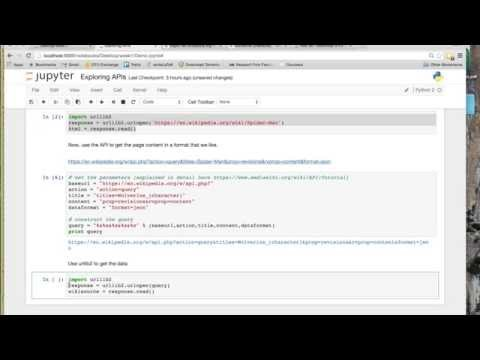

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the rock performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [219]:
import requests
import os
from urllib.parse import quote
import time
import json
#We made a wikipediadownloader class that downloads and saves the json version of a wikipedia page

class WikipediaDownloader:
    def __init__(self):
        self.base_url = "https://en.wikipedia.org/w/api.php"

        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        })

    def download_page_html(self, title):
        try:
            params = {
                "action": "query",
                "prop": "revisions",
                "rvprop": "content",
                "format": "json",
                "titles": title.replace(' ', '_'),  # Use the actual title parameter
                "rvslots": "main"
            }
            print(f"Downloading: {title}")
            response = self.session.get(self.base_url, params=params)

            response.raise_for_status()
            return response.text
        except requests.RequestException as e:
            print(f"Error downloading {title}: {e}")
            return None

    def save_page(self, title, content):
        if content is None:
            return False

        # Create directory if it doesn't exist
        os.makedirs("wikipedia_pages/wikipedia_pages", exist_ok=True)

        # Clean filename
        safe_filename = "".join(c for c in title if c.isalnum() or c in (' ', '-', '_')).rstrip()
        filename = f"wikipedia_pages/{safe_filename}.json"

        try:
            with open(filename, 'w', encoding='utf-8') as f:
                f.write(content)
            print(f"Saved: {filename}")
            return filename
        except IOError as e:
            print(f"Error saving {title}: {e}")
            return False

    def download_and_save(self, title):
        content = self.download_page_html(title)

        if content:
            return self.save_page(title, content)
        return False

downloader = WikipediaDownloader()

favorite_pages = [
    "List of mainstream rock performers"
]
for page_title in favorite_pages:
    print(f"\n--- Processing: {page_title} ---")

    # Download HTML version
    file_name = downloader.download_and_save(page_title)
    if(file_name):
        print(f"Successfully downloaded and saved: {file_name}")
    else:
        print(f"Failed to download or save: {page_title}")


--- Processing: List of mainstream rock performers ---
Downloading: List of mainstream rock performers
Saved: wikipedia_pages/List of mainstream rock performers.html
Successfully downloaded and saved: wikipedia_pages/List of mainstream rock performers.html


In [220]:
with open("wikipedia_pages/wikipedia_pages/List of mainstream rock performers.html", "r") as f:
    html_content = f.read()

# Parse the JSON to properly decode Unicode escapes
import json
parsed_json = json.loads(html_content)
page_id = list(parsed_json['query']['pages'].keys())[0]
wiki_text = parsed_json['query']['pages'][page_id]['revisions'][0]['slots']['main']['*']

# Now extract from the properly decoded text
pattern = r'\[\[([^\]|]+)'

In [221]:
import re
# Find all matches from the decoded wiki text
matches = re.findall(pattern, wiki_text)

# Optional: remove duplicates and sort
artists = sorted(set(matches))

# Save to a text file
with open("artists.txt", "w", encoding="utf-8") as f:
    for artist in artists:
        f.write(artist + "\n")

print(f"Extracted {len(artists)} artists and saved to artists.txt")

Extracted 492 artists and saved to artists.txt


In [222]:
with open("artists.txt", "r") as file:
    lines = file.readlines()

with open("artists.txt", "w") as file:
    for line in lines[:-1]:
        file.write(line)


In [224]:
# Open the file in read mode
artists_file_names = []
with open("artists.txt", "r", encoding="utf-8") as file:
    for line in file:
        artist = line.strip()  # remove leading/trailing spaces and newline
        file_name = downloader.download_and_save(artist)
        if(file_name):
            artists_file_names.append(file_name)
        else:
            print(f"Failed to download or save: {page_title}")



Downloading: 10 Years (band)
Saved: wikipedia_pages/10 Years band.html
Downloading: 10cc
Saved: wikipedia_pages/10cc.html
Downloading: 3 Doors Down
Saved: wikipedia_pages/3 Doors Down.html
Downloading: 311 (band)
Saved: wikipedia_pages/311 band.html
Downloading: 38 Special (band)
Saved: wikipedia_pages/38 Special band.html
Downloading: A Perfect Circle
Saved: wikipedia_pages/A Perfect Circle.html
Downloading: ABBA
Saved: wikipedia_pages/ABBA.html
Downloading: AC/DC
Saved: wikipedia_pages/ACDC.html
Downloading: AFI (band)
Saved: wikipedia_pages/AFI band.html
Downloading: Accept (band)
Saved: wikipedia_pages/Accept band.html
Downloading: Adam Ant
Saved: wikipedia_pages/Adam Ant.html
Downloading: Aerosmith
Saved: wikipedia_pages/Aerosmith.html
Downloading: Air Supply
Saved: wikipedia_pages/Air Supply.html
Downloading: Alanis Morissette
Saved: wikipedia_pages/Alanis Morissette.html
Downloading: Alice Cooper
Saved: wikipedia_pages/Alice Cooper.html
Downloading: Alice Cooper (band)
Saved: wi

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps.

In [225]:
artist_array = []
with open("artists.txt", "r", encoding="utf-8") as file:
    for line in file:
        # Just strip whitespace, don't need to replace parentheses or slashes
        artist_array.append(line.strip())  # remove leading/trailing spaces and newline

In [226]:
artist_array

['10 Years (band)',
 '10cc',
 '3 Doors Down',
 '311 (band)',
 '38 Special (band)',
 'A Perfect Circle',
 'ABBA',
 'AC/DC',
 'AFI (band)',
 'Accept (band)',
 'Adam Ant',
 'Aerosmith',
 'Air Supply',
 'Alanis Morissette',
 'Alice Cooper',
 'Alice Cooper (band)',
 'Alice in Chains',
 'AllMusic',
 'Alter Bridge',
 'Ambrosia (band)',
 'America (band)',
 'Anthrax (American band)',
 'April Wine',
 'Arcade Fire',
 'Arctic Monkeys',
 'Asia (band)',
 'Audioslave',
 'Avenged Sevenfold',
 'Avril Lavigne',
 'Awolnation',
 'Bachman–Turner Overdrive',
 'Bad Company',
 'Badfinger',
 'Barenaked Ladies',
 'Bay City Rollers',
 'Beastie Boys',
 'Beck',
 'Bee Gees',
 'Ben Folds Five',
 'Bill Haley & His Comets',
 'Billy Idol',
 'Billy Joel',
 'Billy Squier',
 'Billy Talent',
 'Black Sabbath',
 'Black Stone Cherry',
 'Black Veil Brides',
 'Blink-182',
 'Blondie (band)',
 'Bloodhound Gang',
 'Blue October',
 'Blue Öyster Cult',
 'Blues Traveler',
 'Blur (band)',
 'Bo Diddley',
 'Bob Dylan',
 'Bob Seger',
 'B

In [233]:
def find_referenced_artists(artist_to_find, current_artist, current_artist_file_name):
    file_path = current_artist_file_name
    with open(file_path, "r", encoding="utf-8") as f:
        wiki_html = f.read()

    # Find all wiki links with regex
    pattern = r"\[\[" + re.escape(artist_to_find) + r"(?:\|[^\]]+)?\]\]"

    if re.search(pattern, wiki_html):
        return True
    else:
        return False

In [234]:
roct_artists_graph = nx.DiGraph()

for artist in artist_array:
    roct_artists_graph.add_node(artist)

for index in range (len(artist_array)):
    artist = artist_array[index]
    artist_file_name = artists_file_names[index]
    for artist_to_find in artist_array:
        if artist != artist_to_find:
            if find_referenced_artists(artist_to_find, artist, artist_file_name):
                roct_artists_graph.add_edge(artist, artist_to_find)



*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


*Excercise*: Explain your process in words

> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.